In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%tensorflow_version 1.x
import pandas as pd
import tensorflow as tf
from keras import Model,optimizers
from sklearn.metrics import accuracy_score

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x=np.load('/content/drive/My Drive/kannadatogether/traindata.npy')
labels=pd.read_csv('/content/drive/My Drive/kannadatogether/labels.csv',index_col=0)

In [ ]:
y=labels.to_numpy()

In [ ]:
print(x.shape)
print(y.shape)

(19598, 150, 150, 1)
(19598, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,47)
y_test=to_categorical(y_test,47)
print(y_train.shape)
print(y_test.shape)

(15874, 47)
(1960, 47)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
y_val=to_categorical(y_val,47)
print(y_val.shape)

(15874, 150, 150, 1)
(1960, 150, 150, 1)
(1764, 150, 150, 1)
(1764, 47)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
imggen=ImageDataGenerator(rotation_range=10,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.1,zoom_range=0.25)

In [ ]:
"""from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))"""

'from keras.backend import sigmoid\ndef swish(x, beta = 1):\n    return (x * sigmoid(beta * x))'

In [ ]:
"""from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})"""

"from keras.utils.generic_utils import get_custom_objects\nfrom keras.layers import Activation\nget_custom_objects().update({'swish': Activation(swish)})"

In [ ]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,Dropout,Flatten,MaxPooling2D,BatchNormalization,AveragePooling2D,GlobalMaxPooling2D,ZeroPadding2D

model=Sequential()

#model.add(mainmodel)
model.add(ZeroPadding2D(padding=(1,1),input_shape=(150,150,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,1),padding='same',activation='relu'))  
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D((3,3))) #Same as Maxpool2D
model.add(Dropout(0.25))

"""
model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(130,130,1),activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))  
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #Same as Maxpool2D
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2))) #Same as Maxpool2D

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2))) #Same as Maxpool2D
"""


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 152, 152, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 152, 152, 32)      320       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 154, 154, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 154, 154, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 51, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 51, 51, 32)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 53, 53, 32)       

In [ ]:
history=model.fit_generator(imggen.flow(x_train,y_train,batch_size=64),epochs=100,validation_data=imggen.flow(x_val,y_val,batch_size=64)) 


Epoch 1/100
249/249 [==============================] - 59s 236ms/step - loss: 3.8509 - accuracy: 0.0203 - val_loss: 3.8521 - val_accuracy: 0.0232
Epoch 2/100
249/249 [==============================] - 51s 206ms/step - loss: 3.8503 - accuracy: 0.0200 - val_loss: 3.8516 - val_accuracy: 0.0198
Epoch 3/100
249/249 [==============================] - 51s 206ms/step - loss: 3.8502 - accuracy: 0.0218 - val_loss: 3.8492 - val_accuracy: 0.0198
Epoch 4/100
249/249 [==============================] - 51s 206ms/step - loss: 3.8502 - accuracy: 0.0222 - val_loss: 3.8507 - val_accuracy: 0.0198
Epoch 5/100
249/249 [==============================] - 51s 206ms/step - loss: 3.8501 - accuracy: 0.0224 - val_loss: 3.8535 - val_accuracy: 0.0198
Epoch 6/100
249/249 [==============================] - 51s 206ms/step - loss: 3.8501 - accuracy: 0.0230 - val_loss: 3.8528 - val_accuracy: 0.0198
Epoch 7/100
249/249 [==============================] - 51s 206ms/step - loss: 3.8503 - accuracy: 0.0222 - val_loss: 3.8496 

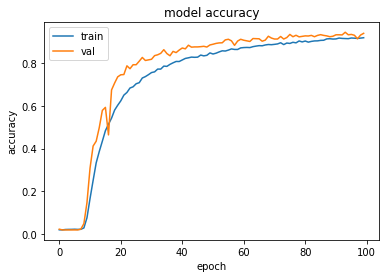

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

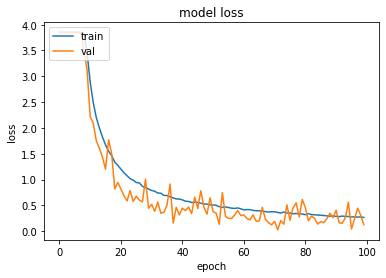

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/kannadacombinedmain100epochs.h5')

In [ ]:
#model.save_weights('/content/drive/My Drive/model files/kannadacombined_weights96.58.h5')

In [ ]:
#from keras.models import load_model
#model=load_model('/content/drive/My Drive/model files/kannadacombined96.58.h5')

In [ ]:
#model.evaluate(x_test,y_test)

1960/1960 [==============================] - 3s 2ms/step


[0.16155156212649782, 0.9627550840377808]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#y_pred=model.predict(x_test)

In [ ]:
print(y_pred.shape)

In [ ]:
layer_name='dense_1'
layer_model=Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

In [ ]:
fc=layer_model.predict(x_train)
print(fc.shape)

In [ ]:
#np.save('/content/drive/My Drive/kannadatogether/featurestraincombined',train_features)
#np.save('/content/drive/My Drive/kannadatogether/featurestestcombined',test_features)

In [ ]:
feature_col=[]
for i in range(1024):
  feature_col.append("f_"+str(i))

In [ ]:
train_features=pd.DataFrame(data=fc,columns=feature_col)
feature_col=np.array(feature_col)

In [ ]:
y_train.shape

In [ ]:
#y_train1=np.load('/content/drive/My Drive/kannadatogether/y_train1.npy')
#y_test1=np.load('/content/drive/My Drive/kannadatogether/ytest1.npy')

In [ ]:
y_test1=np.squeeze(y_test1,axis=1)
y_train1=np.squeeze(y_train1,axis=1)

In [ ]:
print(y_train1.shape)
print(y_test1.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=5000,min_samples_split=8,max_features=12)
rf.fit(train_features,y_train)

In [ ]:
from sklearn.svm import SVC
clf=SVC(degree=4,C=2.5,gamma='auto',kernel='rbf',decision_function_shape='ovo')
clf.fit(train_features,y_train1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=20)
k.fit(train_features,y_train1)

In [ ]:
testfeatures=[]
testfeatures.append(layer_model.predict(x_test))
testfeatures=np.array(testfeatures) 

In [ ]:
testfeatures=np.squeeze(testfeatures,axis=0)

In [ ]:
testfeatures.shape

In [ ]:
test_features=pd.DataFrame(data=testfeatures,columns=feature_col)
feature_col=np.array(feature_col)

In [ ]:
#pred=clf.predict(test_features)

In [ ]:
#acc=clf.score(test_features,y_test1)
#print(acc)

In [ ]:
#p=k.predict(test_features)

In [ ]:
#accuracy=accuracy_score(y_test1,p)
#print(accuracy)

In [ ]:
print(accuracy)

In [ ]:
print(acc)

In [ ]:
#pr=rf.score(test_features,y_test)
#print(pr)

In [ ]:
#print(pred.shape)

In [ ]:
#ac=accuracy_score(y_test,pred)

In [ ]:

labels = list(map(lambda x: 'C' + str(x), list(range(1,48)))) # change this accordingly for vowels
from sklearn.metrics import classification_report
print(classification_report(y_test1, pred, target_names=labels))

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix
print(f1_score(yt,y_pred,average='macro'))

In [ ]:
print(f1_score(y_test1,y_pred,average='micro'))

In [ ]:
print(recall_score(yt,y_pred,average='macro'))

In [ ]:
print(recall_score(yt,y_pred,average='micro'))

In [ ]:
print(precision_score(yt,y_pred,average='macro'))

In [ ]:
print(precision_score(yt,y_pred,average='micro'))

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
print(confusion_matrix(y_test1,y_pred))